In [71]:
#Livrarias usadas
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as shc


In [85]:
df = pd.read_table("MCDONALDS.csv", sep=";", decimal = ',')
df.set_index('Lanche', inplace = True)
df[0:4]

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro
Lanche,,,,,,,,,,,
Big Mac,504,41,25,27.0,12.0,0.5,54,3.5,960,162,6.5
Big Tasty,843,45,41,55.0,24.0,1.7,104,5.1,1511,381,8.2
Quarterao,558,36,31,32.0,16.0,1.3,86,3.6,1216,275,10.0
Mcnifico Bacon,625,38,34,37.0,16.0,1.3,95,3.9,1255,209,11.0


In [74]:
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns, index = df.index)
df_scaled = df_scaled.rename_axis(None, axis=0)
df_scaled[0:4]

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro
Big Mac,0.061012,-0.039432,-0.226198,0.231040,0.495453,-0.181818,-0.207390,-0.149545,-0.547261,0.135014,0.772999
Big Tasty,2.080827,0.398701,1.187539,2.512109,2.384093,2.090909,1.232820,0.785111,1.001007,2.862701,1.368044
Quarterao,0.382752,-0.587098,0.303953,0.638373,1.125000,1.333333,0.714345,-0.091129,0.172080,1.542451,1.998092
Mcnifico Bacon,0.781949,-0.368032,0.569029,1.045707,1.125000,1.333333,0.973582,0.084119,0.281667,0.720408,2.348119


In [75]:
df_scaled.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Valor Energetico,25.0,6.661338e-17,1.020621,-1.410653,-0.725465,-0.236896,0.382752,2.199990
Carboidratos,25.0,4.440892e-17,1.020621,-1.353832,-0.915698,-0.148965,0.508234,1.713101
Proteinas,25.0,1.162959e-16,1.020621,-1.286500,-0.844708,-0.049481,0.569029,2.336200
Gorduras Totais,25.0,-1.199041e-16,1.020621,-1.333122,-0.665095,-0.339228,0.475440,2.512109
Gorduras Saturadas,25.0,-5.773160e-17,1.020621,-1.267277,-0.700685,-0.291480,0.495453,2.384093
Gorduras Trans,25.0,4.996004e-17,1.020621,-0.939394,-0.750000,-0.371212,0.196970,2.090909
Colesterol,25.0,-1.021405e-16,1.020621,-1.445972,-0.812279,-0.207390,0.627932,2.413793
Fibra Alimentar,25.0,-8.548717e-17,1.020621,-1.551529,-0.908953,-0.149545,0.785111,1.719767
Sodio,25.0,2.109424e-17,1.020621,-1.721808,-0.749575,-0.232549,0.579518,2.141835
Calcio,25.0,3.552714e-17,1.020621,-1.421884,-1.010863,0.172380,0.521125,2.862701


<Axes: >

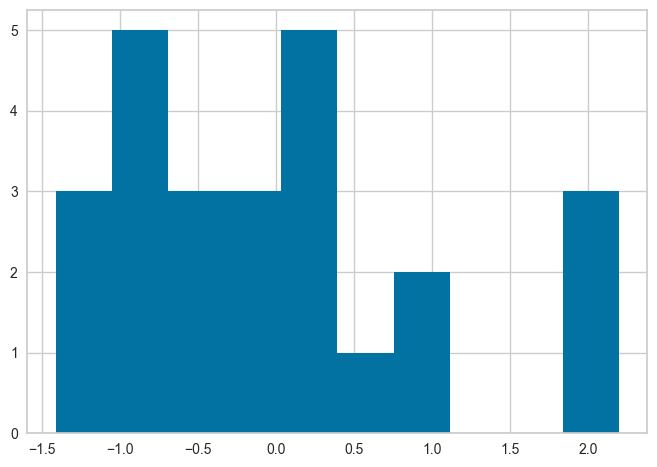

In [76]:
df_scaled['Valor Energetico'].hist()


In [77]:
import seaborn as sns
#sns.pairplot(df_scaled)

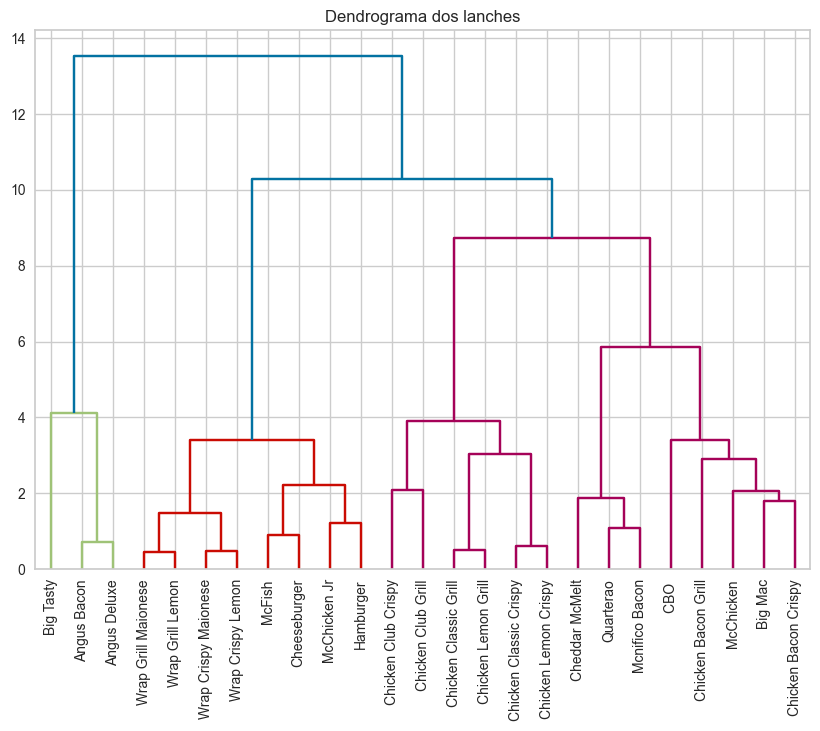

In [86]:
# Definição da plotagem
plt.figure(figsize=(10, 7))
plt.title("Dendrograma dos lanches")
selected_data = df_scaled.iloc[:, 1:11]
clusters = shc.linkage(selected_data, 
                       method='ward', 
                       metric="euclidean")
dend = shc.dendrogram(clusters, 
                      labels=df_scaled.index, 
                      leaf_font_size=10)
# rotação 90º da legenda
plt.xticks(rotation=90)
plt.show()

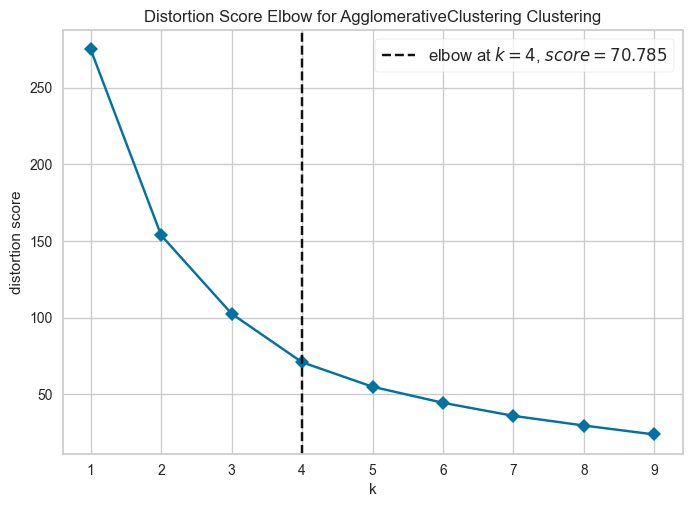

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:


model = AgglomerativeClustering(linkage='ward')
visualizer = KElbowVisualizer(model, k=(1, 10), timings=False)
visualizer.fit(df_scaled)
visualizer.show()


In [80]:
clustering_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clustering_model.fit(df_scaled)
clustering_model.labels_+1

array([1, 2, 4, 4, 4, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1,
       2, 2, 1])

In [87]:
df["grupo_lanches_4"] = pd.Series(clustering_model.labels_+1, index=df.index)
df[0:4]


,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro,grupo_lanches_4
Lanche,,,,,,,,,,,,
Big Mac,504,41,25,27.0,12.0,0.5,54,3.5,960,162,6.5,1
Big Tasty,843,45,41,55.0,24.0,1.7,104,5.1,1511,381,8.2,2
Quarterao,558,36,31,32.0,16.0,1.3,86,3.6,1216,275,10.0,4
Mcnifico Bacon,625,38,34,37.0,16.0,1.3,95,3.9,1255,209,11.0,4


In [83]:
df.reset_index(inplace=True)
df[0:4]

,Lanche,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro,gupo_lanches_4
0,Big Mac,504,41,25,27.0,12.0,0.5,54,3.5,960,162,6.5,1
1,Big Tasty,843,45,41,55.0,24.0,1.7,104,5.1,1511,381,8.2,2
2,Quarterao,558,36,31,32.0,16.0,1.3,86,3.6,1216,275,10.0,4
3,Mcnifico Bacon,625,38,34,37.0,16.0,1.3,95,3.9,1255,209,11.0,4


In [84]:
df.to_csv('Base_Final_Pythoncode.csv', sep=';', decimal=',', index=False)
